# Assignment 2

Complete the questions below in any order you like. Remember to commit the changes to GitHub as you go. The total marks for this assignment is 30.

 **Please enter your student number in the cell below**


In [76]:
22380966

22380966

# Question 0 [3 marks]

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub
- You will get marks for the question for using Git (i.e., pushing your assignment to the repository when asked below)

In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

# Question 1: Bracketing and bisection method [9 marks]

### Q. 1a [2 marks]
Define a function for the quintic $f(x) = 6 x^5-25 x^4-115 x^3+325 x^2+709 x-420$ and plot it in the range $x=-3.5\dots5.5$

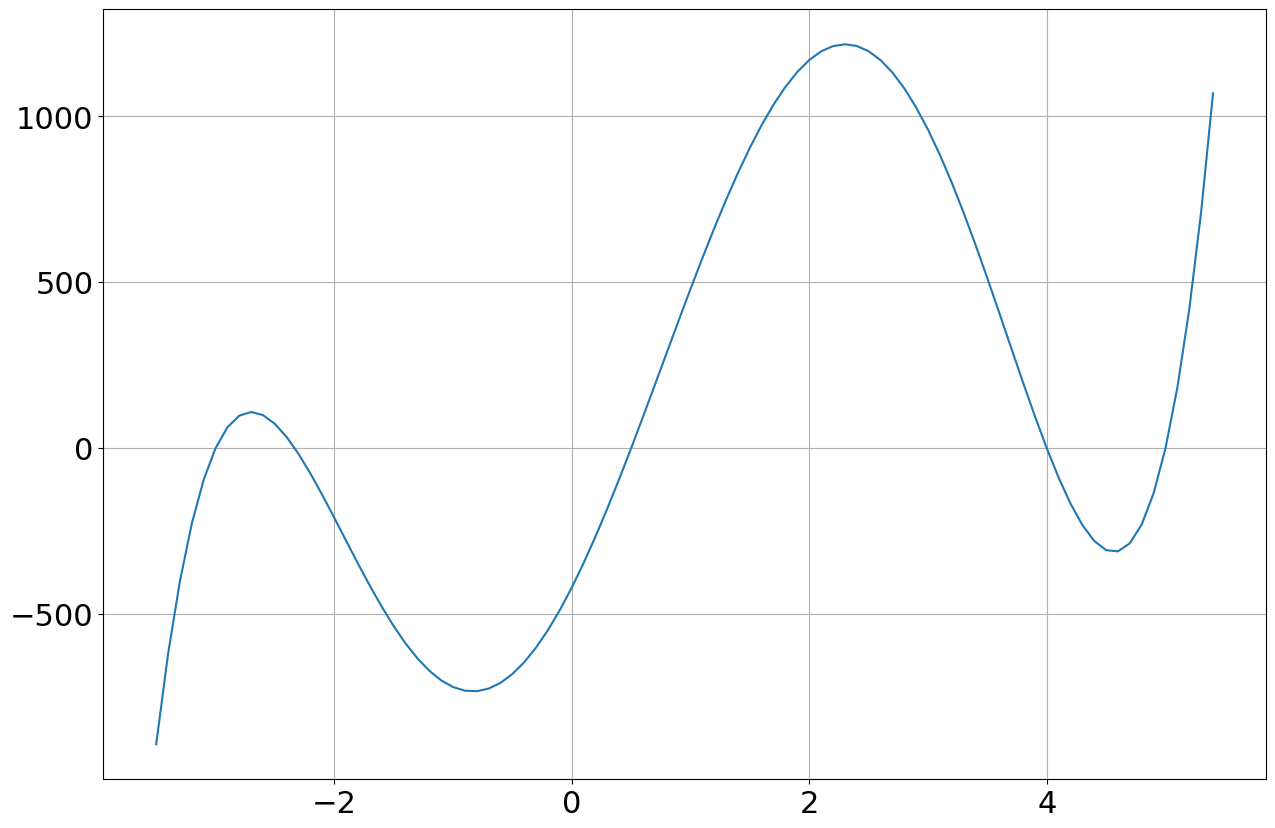

In [79]:
def f(x):
    return (6*x**5 - 25*x**4 - 115*x**3 + 325*x**2 + 709*x - 420)

x = np.arange(-3.5,5.5,0.1) 
y= f(x)

plt.grid()
plt.plot(x,y)

### Q. 1b [2 marks]
Using the plot, pick values of $a$ and $b$ such that $f(a) < 0$ and $f(b) > 0$ and the function has a **single** root in the region $(a,b)$. Assign variables called a and b to these values and print the values of $f(a)$ and $f(b)$.

In [80]:
a = f(0)
b = (2)

print(a,b)

-420 2


Use the following FindRootBisection method to find the root to within a precision of $10^{-12}$

In [81]:
# This function only works when a < b and f(a) < 0 < f(b)
def FindRootBisection(f, a, b, tol, printSteps=False):
    left = a
    right = b
    while right-left > tol:
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
    return midpoint

In [82]:
root = FindRootBisection(f, a, b, 10**-12)
print(root)

0.49999999999976197


### Q. 1c [5 marks]
As the comment on the above FindRootBisection( ) function says it only works when $a<b$ and $f(a) < 0 < f(b)$. Create a new function that: 
 - **also** works when $f(a) > 0 > f(b)$. 
 - Checks that $\text{sign}(f(a)) \neq \text{sign}(f(b))$. If not the function should return "sign(f(a)) = sign(f(b)) ", where $a$ and $b$ have been replaced by their values
 
Call your new function FindRootBisectionImproved( ).  
Useful function: np.sign(x) will return sign(x)

Check your new function by:
 - finding the root between $x = 3.5$ and $x=4.5$
 - finding the root between $x = 0$ and $x=2$
 - attempting to find a root between $x=6$ and $x=8$ (there is not root in this region)
 
In all cases try to find the root with a tolerance of $10^{-12}$

In [83]:
def FindRootBisectionImproved(f, a, b, tol, printSteps=False):
    if a > b:
        left = b
        right = a
    else:
        left = a
        right = b

    if np.sign(a) == np.sign(b):
        return f"sign(f({a})) = sign(f({b}))"

    while right-left > tol:
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
    return midpoint


test1 = FindRootBisectionImproved(f, 3.5, 4.5, 10**-12)
test2 = FindRootBisectionImproved(f, 0, 2, 10**-12)
test3 = FindRootBisectionImproved(f, 6, 8, 10**-12)

print(test1, test2, test3)

sign(f(3.5)) = sign(f(4.5)) 0.4999999999990905 sign(f(6)) = sign(f(8))


**Commit this question to your git repository and push the changes to GitHub**

# Question 2: Newton-Raphson method [9 marks]

### Q. 2a [3 marks]
 - Define a function $p(x) = x\log(\sqrt{x^2})$. Compute its derivative and define it as $dp(x) = \dots$
 - Plot the function between $x=-2$ and $x=2$. Label the plot axes and use a grid.
 - By visual inspection state the location of the three roots

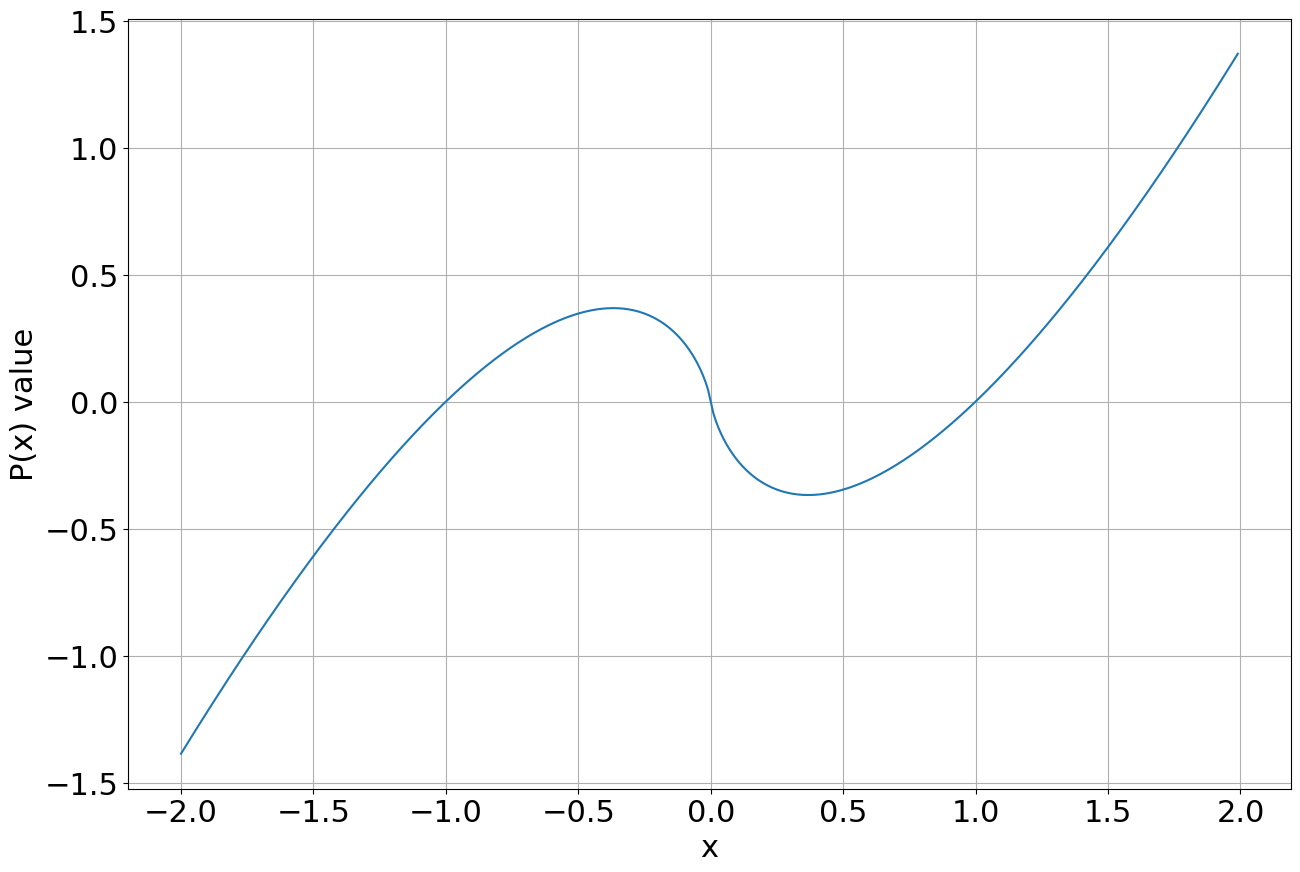

In [84]:
def p(x):
    return (x*np.log(np.sqrt(x**2)))

def dp(x):
    return (0.5*(np.log(x**2)+2))

x = np.arange(-2,2,0.01) 
y1 = p(x)

plt.grid()
plt.ylabel('P(x) value')
plt.xlabel('x')
plt.plot(x,y1)

# Visual Inspection of roots = -1, 0, 1

### Q. 2b [2 marks]
 - Starting with a value $x_0$ near the root at $x=1$ such that $|x_0-1| \ge 0.5$ use the below Newton-Raphson code to find the root to accuracy of $1\times10^{-6}$

In [85]:
def FindRootNewtonRaphson(f, df, x0, tol, printSteps=False):
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol and count < 20:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        count += 1
        if(printSteps):
            print("x_%d = %.14lf" % (count, x0))
    return x0

In [91]:
print(FindRootNewtonRaphson(p, dp, 1.8, 10**-6))

1.0


### Q. 2c [4 marks]
As we discussed in the lectures, the Newton-Raphson method (usually) converges quadradically if an initial guess is given that is sufficiently close to the root. If the guess is too far from the root the method can diverge. In this question we will find the critical value between converging and diverging where the method oscilliates with period 2.

If we define $F(x) = x - p(x)/p'(x)$, then a period-2 orbit will occur when $F(F(x)) = x$. In general this will be a complicated function so it might be very difficult to find the solution analytically. Instead, we can write this equation as $F(F(x)) - x = 0$, so the value of $x$ we want is the root.

- Define a function F(x)
- Define a function F2(x) which returns $F(F(x)) - x$
- Plot F2(x) between $x=-0.2\dots0.2$. Restrict the range on the $y$-axis to be between $-0.5$ and $0.5$. Add labels and a grid.

- We want to find a root with $x \neq \{-1,0,1\}$. As we don't have easy access to the derivative of the function $F2(x)$ use the bisection method function from above to find a root to a precision of $10^{-15}$. Use the plot from the previous part to bracket a root. **Assign** the vaue of the root of the variable 'x2' and also print(x2).
- Using the Newton-Raphson method with the function $p(x)$ and the initial guess x2. Set the final argument to True to print out the steps in the method takes. You should see that they oscillate between two values and does not converge.

By slightly perturbing the initial guess we can get the method to converge or diverge. Try:
 - adding $10^{-3}$ to the initial guess. Does the method converge or diverge? If it converges, to which root does it converge?
 - subtracting $10^{-3}$ from the initial guess. Does the method converge or diverge? If it converges, to which root does it converge?
 
In both cases set the final argument to 'True' to get the function to print the steps the method is taking

**Commit this question to your git repository and push the changes to GitHub**

# Question 3: Slow convergence of the Newton-Raphson method at repeated roots [9 marks]
The Newton-Raphson method usual converges quadratically but it will converge more slowly at repeated roots. In this question we will look at an example of this.

Define the function $g(x) = (x+1)^2(x-2)$, and also define its derivative $g'(x)$. Plot the function from $x=-2\dots2.5$

Run the FindRootNewtonRaphson command with the final (optional) argument set to True to see the steps the algorithm takes. Run it with:
 - the initial value of $x_0 = -1.5$
 - the initial value of $x_0 = 1.5$

What do you notice about the convergence rates in these two cases? Let's examine it more carefully. The function below returns the individual steps of the Newton-Raphson algorithm.

In [ ]:
def FindRootNewtonRaphsonSteps(f, df, x0, tol):
    steps = np.array([x0])
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        steps = np.append(steps, x0)
        count += 1
    return steps

Using the above function:
- compute the steps for the function $g(x)$ with  $x_0 = 1.5$. Assign the result to a variable.
- compute the steps for the function $g(x)$ with  $x_0 = -1.5$. Assign the result to a different variable.

Plot the absolute difference between the steps and the relevant root, i.e., $|x_n - x_*|$, on a log scale.

You should find the repeated difference for the repeated root looks linear on the log-scale, which is the same as we saw for the bisection method. This (correctly) suggests that for repeated roots the Newton-Raphson converges linearly (rather than quadratically)

**Commit this question to your git repository and push the changes to GitHub. Your assignment will be graded directly from GitHub.**

# Bonus question

The below question will not be graded but is provided for extra practice. Note the material in the question will not be examined.


We've seen that the Bisection method converges linearly and the Newton-Raphson method converges quadratically. This raises the question: is there a method that converges cubicly (or higher?).

Indeed such a method exists: [Halley's Method](https://en.wikipedia.org/wiki/Halley%27s_method), which is one of a broad class of [Householder's methods](https://en.wikipedia.org/wiki/Householder%27s_method)

Implement Halley's method and show that the converges is faster than the Newton-Raphson method. Try testing it on the polynomial $f(x) = -1+10x+6x^2+x^3$ and compare your results to the Example on the Householder's methods Wikipedia page linked above.

Note: Halley's method converges so fast it that, using machine precision arithmetic, the convergence plot would only have a few points on it. See [mpmath](https://mpmath.org/) if you want to do extended precision calculations in Python.